## <center>Mayhem at DinoFun World Visitor Communication: Solution</center>

## <center>Submitted By</center>

## <center>Ben Karabinus</center>

## <center>University of Denver</center>

## <center> Ritchie School of Engineering and Computer Science</center>

## <center>COMP 4449, Data Science Capstone</center>

## <center>Fall Quarter 2022</center>

## Project Summary

The DinoFun World theme park recently honored international soccer star and hometown hero Scott Jones with an exhibit displaying his various achievements, including championship trophies, Olympic medals and the like. What started out as a celebrated community event turned into an act of vandalism when criminals broke into Creighton pavilion and made off with some of Scott’s Olympic medals among other things. Police where immediately on the scene and began questioning park visitors and personnel in hopes of discovering who may have perpetrated the crime. Park visitors communicate using a mobile application when at DinoFun World. To help finger the culprits, park app communication data from the weekend of the crime will be analyzed to find odd or abnormal patterns that might have occurred.

Analysis will focus on the following key points:

- Initial exploratory data analysis.
- Identify users with high volume of communication the weekend of the crime.
- When is message volume the highest, does high message volume correlate with the number park visitors?
- Which users have the highest volume of communication, were did high-volume communication occur?
- Perform further analysis on time intervals of interest.

In [7]:
"""read in python packages used for analysis"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

## Initial Exploratory Data Analysis

- Read in transformed data for initial EDA.
- Determine the total number of communication app users for each day and for the weekend as a whole.
    - Print the total number of users.
    - Print the total number of users who sent a message.
    - Print the total number of user who received a message.
- Print the number of park app users who visited the park for multiple days over the weekend.

In [8]:
"""read in transformed data for initial eda"""

friday = pd.read_pickle('../TransformedData/friday_base.pkl')
saturday = pd.read_pickle('../TransformedData/saturday_base.pkl')
sunday = pd.read_pickle('../TransformedData/sunday_base.pkl')
combined = pd.read_pickle('../TransformedData/combined_base.pkl')

In [9]:
"""print number of app users for each day and over the whole weekend"""

num_users_fri = pd.concat([friday['from'], friday['to']]).nunique()
num_users_sat = pd.concat([saturday['from'], saturday['to']]).nunique()
num_users_sun = pd.concat([sunday['from'],sunday['to']]).nunique()
all_id = pd.Series(pd.concat([combined['to'], combined['from']]).unique())
total_users = all_id.count()
print("The total number of communication app users on Friday was: ", num_users_fri)
print("The total number of communication app users on Saturday was: ", num_users_sat)
print("The total number of communication app users on Sunday was: ", num_users_sun)
print("The total number of communication app users for the entire weekend was: ", total_users)

The total number of communication app users on Friday was:  5876
The total number of communication app users on Saturday was:  10525
The total number of communication app users on Sunday was:  12158
The total number of communication app users for the entire weekend was:  18820


In [10]:
"""print the total number of users who sent a message"""

# calculate unique senders
unique_senders_fri = friday['from'].nunique()
unique_senders_sat = saturday['from'].nunique()
unique_senders_sun = sunday['from'].nunique()
unique_senders_total = combined['from'].nunique()
# print values
print("The total number of unique senders on Friday was: ", unique_senders_fri)
print("The total number of unique senders on Saturday was: ", unique_senders_sat)
print("The total number of unique senders on Sunday was: ", unique_senders_sun)
print("The total number of unique senders was: ", unique_senders_total)

The total number of unique senders on Friday was:  2950
The total number of unique senders on Saturday was:  5297
The total number of unique senders on Sunday was:  6118
The total number of unique senders was:  9429


In [11]:
"""print the total number of users who received a message"""

# calculate unique receivers 
# (note this calculation does not account for the fact that all external receivers are labeled as "external")
unique_receivers_fri = friday['to'].nunique()
unique_receivers_sat = saturday['to'].nunique()
unique_receivers_sun = sunday['to'].nunique()
unique_receivers_total = combined['to'].nunique()
# print values
print("The total number of unique receivers on Friday was: ", unique_receivers_fri)
print("The total number of unique receivers on Saturday was: ", unique_receivers_sat)
print("The total number of unique receivers on Sunday was: ", unique_receivers_sun)
print("The total number of unique receivers was: ", unique_receivers_total)

The total number of unique receivers on Friday was:  2926
The total number of unique receivers on Saturday was:  5228
The total number of unique receivers on Sunday was:  6040
The total number of unique receivers was:  9391


In [12]:
"""determine how many app users visited the park for multiple days over the weekend"""

# get all unique users in each individual day
unique_users_fri = pd.Series(pd.concat([friday['from'], friday['to']]).unique())
unique_users_sat = pd.Series(pd.concat([saturday['from'], saturday['to']]).unique())
unique_users_sun = pd.Series(pd.concat([sunday['from'],sunday['to']]).unique())
# create the combined dataframe
combined_unique = pd.DataFrame(pd.concat([unique_users_fri, unique_users_sat, unique_users_sun]), columns=['unique_id'])
# filter ID of external receivers
combined_unique = combined_unique[combined_unique['unique_id'] != 'external']
# add column to indicate if users were active in the park on Friday
combined_unique['active_friday'] = combined_unique['unique_id'].apply(lambda x: True if (x in unique_users_fri.values) else False)
# add column to indicate if users were active in the park on Saturday
combined_unique['active_saturday'] = combined_unique['unique_id'].apply(lambda x: True if (x in unique_users_sat.values) else False)
# add column to indicate if users were active in the park on Sunday
combined_unique['active_sunday'] = combined_unique['unique_id'].apply(lambda x: True if (x in unique_users_sat.values) else False)
combined_unique.drop_duplicates(subset=['unique_id'], inplace=True)
# apply filtering to the data
friday_saturday = combined_unique[(combined_unique['active_friday'] == True) & (combined_unique['active_saturday'] == True)].shape[0]
saturday_sunday = combined_unique[(combined_unique['active_saturday'] == True) & (combined_unique['active_sunday'] == True)].shape[0]
friday_saturday_sunday = saturday_sunday = combined_unique[(combined_unique['active_saturday'] == True) & (combined_unique['active_saturday']\
                                                            == True) & (combined_unique['active_sunday'] == True)].shape[0]
# print the results
print("The total number of users who attended the park on Friday and Saturday was: ", friday_saturday)
print("The total number of users who attended the park on Saturday and Sunday was: ", saturday_sunday)
print("The total number of users who attended the park on Friday, Saturday and Sunday was: ", friday_saturday_sunday)

The total number of users who attended the park on Friday and Saturday was:  3480
The total number of users who attended the park on Saturday and Sunday was:  10524
The total number of users who attended the park on Friday, Saturday and Sunday was:  10524


Initial Exploratory Data Analysis Summary:

The total number of communication app users for the entire weekend was 18,820, of this 5,876 users attended the park on Friday, 10,525 users attended the park on Saturday, and 12,158 users attended the park on Sunday. Not all users sent and recieved messages. That is, some users only sent message or only received messages. 3,480 users attended the park on Friday and Saturday. 10,524 users attended the park on Saturday and Sunday. 10,524 users attended the park on Friday, Saturday, and Sunday. It appears users who attended the park on both Saturday and Sunday purchased a weekend pass.

## Identify users with high volume of communication the weekend of the crime.

- Read in transformed data to analyze communication volume.
- Print summary statistics for sent message volume.
- Print the user ID's of top 10 senders.
- Print summary statistics for received message volume.
- Print the user ID's of top 10 receivers.
- Print summary statistics for volume of messages sent to external users.
- Perform K-means clustering on the data to label users as having low, medium, high, very high, or extreme volume of communication.
    - Read in transformed data for cluster analysis and remove extreme outliers.
    - Create an elbow plot to determine proper number of clusters.
    - Create the Kmeans model and plot results.
    - Apply Kmeans labels to the data. Labels will indicate what message volume group a user belongs to.
- Plot the distribution of sent messages by volume label.
- Plot the distribution received messages by volume lablel.

In [13]:
"""Read in transformed data to analyze communication volume"""

from_messages_count = pd.read_pickle('../TransformedData/from_messages_count.pkl')
to_messages_count = pd.read_pickle('../TransformedData/to_messages_count.pkl')

In [14]:
"""print summary statistics for sent message volume"""

from_messages_count['from_message_count'].agg(func=['min', 'median', 'mean', 'max','skew'])

min            1.000000
median       211.000000
mean         440.484569
max       190360.000000
skew          79.237159
Name: from_message_count, dtype: float64

In [15]:
"""print the user ID's of the top 10 senders"""

from_messages_count[from_messages_count['from_message_count'] == from_messages_count['from_message_count']]\
.sort_values(by=['from_message_count'], ascending=False).head(10)

,from_message_count
from,
1278894,190360
839736,60812
1045021,3807
1116329,3746
1749109,3708
918738,3707
1250941,3683
970490,3569
128533,3568


In [16]:
"""print summary statistics for received message volume"""

to_messages_count['to_message_count'].agg(func=['min', 'median', 'mean', 'max','skew']).agg(func=['min', 'median', 'mean', 'max','skew'])

min            1.000000
median       192.000000
mean       38120.219974
max       189894.000000
skew           2.236046
Name: to_message_count, dtype: float64

In [17]:
"""print user ID's of the top 10 receivers"""

to_messages_count[to_messages_count['to_message_count'] == to_messages_count['to_message_count']]\
.sort_values(by=['to_message_count'], ascending=False).head(10)

,to_message_count
to,
1278894,189894
external,62077
839736,60818
171002,3270
1116329,3153
1388162,3111
48730,3105
856067,3101
992045,3087


In [18]:
"""read in transformed data for cluster analysis and remove extreme outliers prior to clustering"""

# read in the transformed data
message_volume = pd.read_pickle('../TransformedData/message_volume.pkl')
# subset extreme outliers to add back to dataframe later
message_volume_outliers = message_volume.loc[[5632, 3741]]
# remove extreme outliers
message_volume = message_volume[message_volume['user_id'] != 1278894]
message_volume = message_volume[message_volume['user_id'] != 839736]

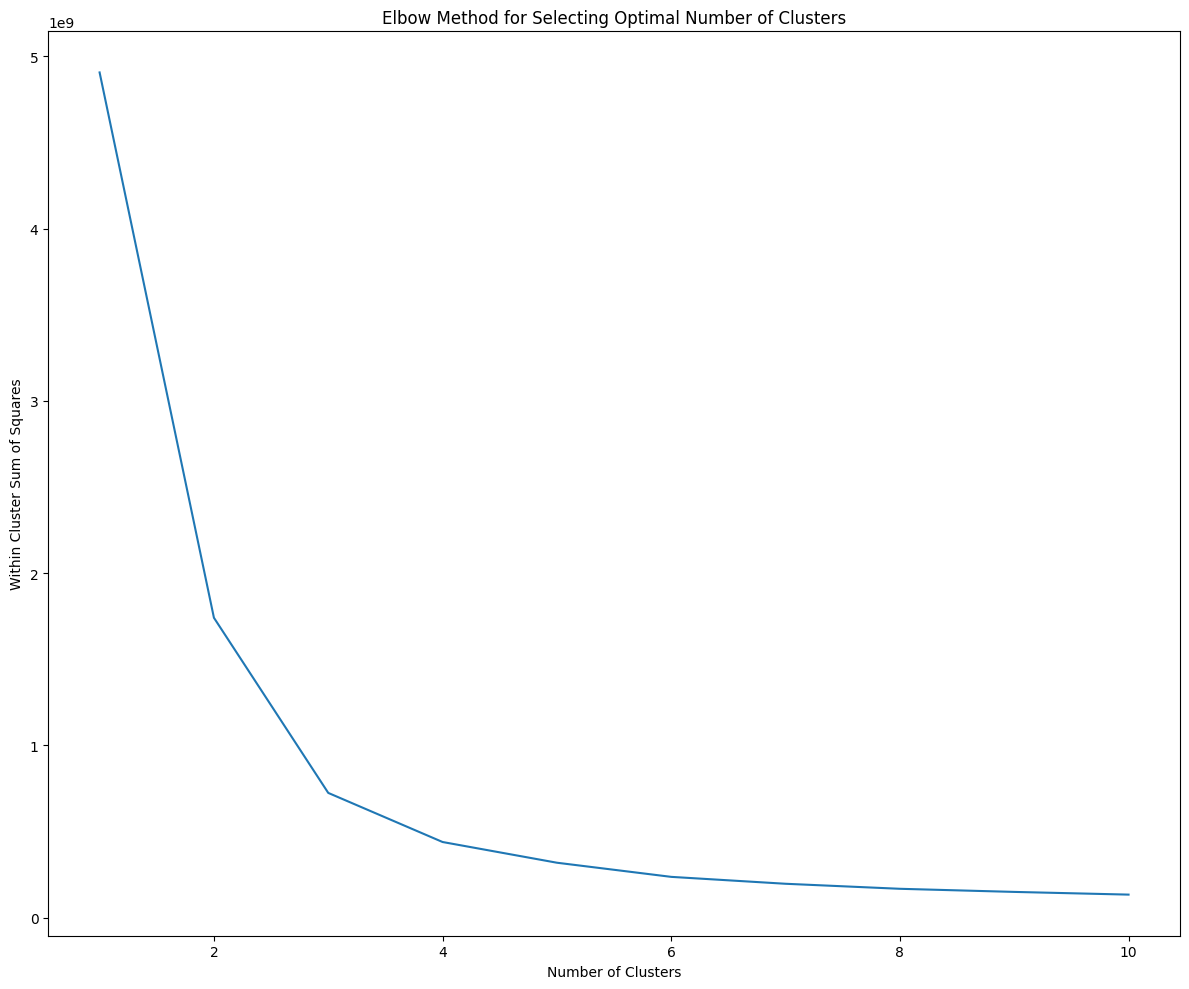

In [19]:
"""create elbow plot to determine proper number of clusters"""

# calculate the within cluster sum of squares
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=42, n_init=10)
    kmeans.fit(message_volume.iloc[:, -2:])
    wcss.append(kmeans.inertia_)
# create the elbow plot
clusters = [i for i in range(1, 11)]
wcss = wcss
fig, ax = plt.subplots(figsize=(12, 10))
plt.plot(clusters, wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('Elbow Method for Selecting Optimal Number of Clusters')
plt.tight_layout()
plt.show()

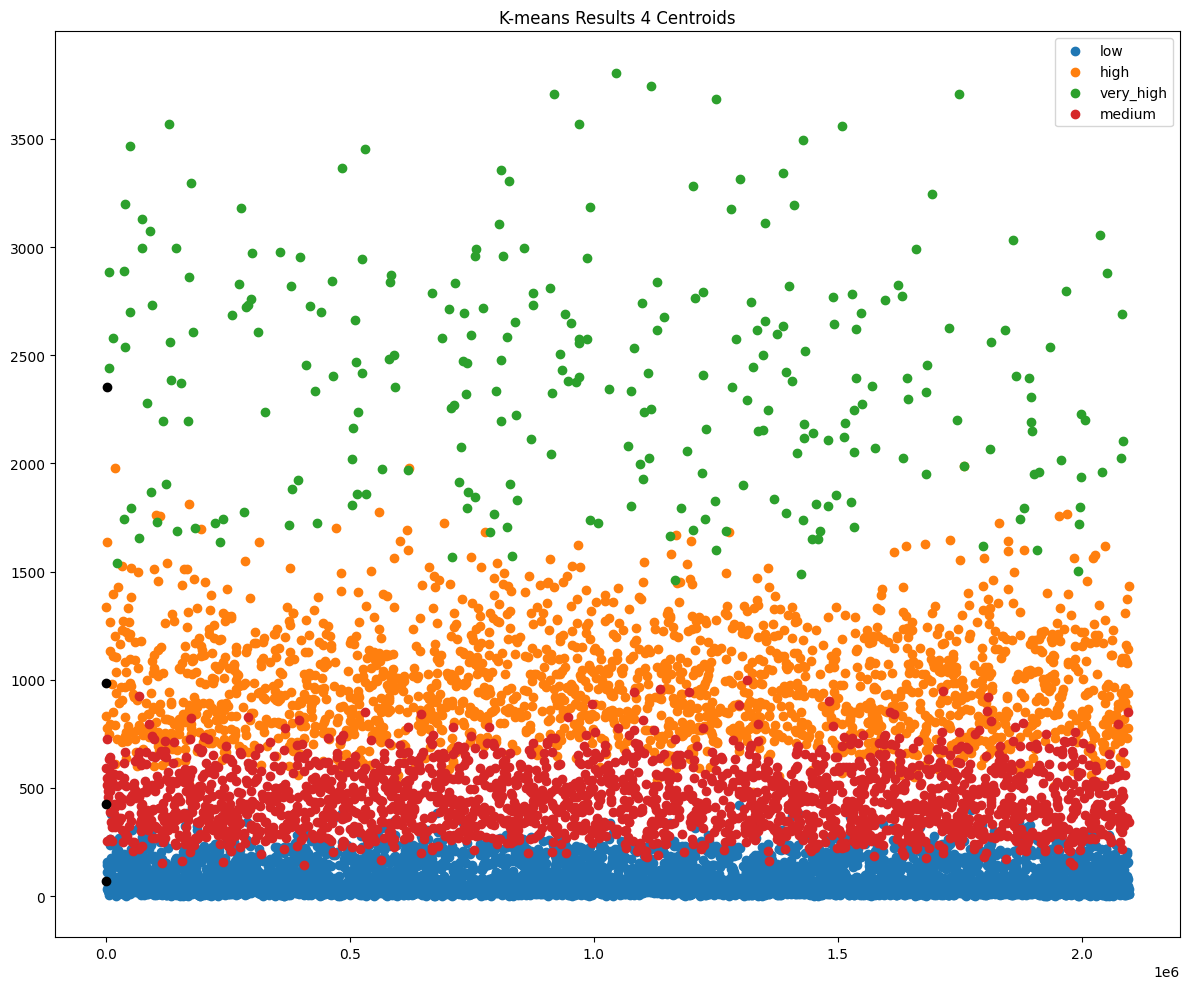

In [20]:
"""instantiate model, append cluster labels to data, plot Kmeans results"""

# define a helper function to visualize K-means results

def plot_kmeans(model, data, predictions):
    # instantiate the pyplot objects
    fig, ax = plt.subplots(figsize=(12, 10))
    # get unique labels in predictions
    labels = np.unique(predictions)
    # get centroids form the fit model
    centroids = model.cluster_centers_
    # iterate over predicted labels and create scatter plot for each
    for label in labels:
        filtered = data[data['cluster_labels'] == label]
        plt.scatter(filtered.iloc[:, :1], filtered.iloc[:, 1:2])
    # add centroids to the graph
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black')
    # add legend for label values
    plt.legend(['low', 'high', 'very_high', 'medium'])
    # add title
    title = 'K-means Results {} Centroids'.format(len(labels))
    plt.title(title)
    plt.tight_layout()
    plt.show()

# instantiate the Kmeans model and apply labels to the data
kmeans = KMeans(n_clusters=4, init = 'k-means++', random_state=42)
labels = kmeans.fit_predict(message_volume.iloc[:, -2:])
message_volume['cluster_labels'] = labels
plot_kmeans(kmeans, message_volume, labels)

In [21]:
"""apply Kmeans labels to the data and add extreme outliers back into the data labeled as extreme"""

message_volume['cluster_labels'] = labels
# create select conditions
conditions = [
    message_volume['cluster_labels'] == 0,
    message_volume['cluster_labels'] == 1,
    message_volume['cluster_labels'] == 2,
    message_volume['cluster_labels'] == 3
]
# create select values
values = [
    'low',
    'high',
    'very_high',
    'medium'
]
# apply select to the data
message_volume['message_volume'] = np.select(conditions, values)
# drop the cluster_labels column
message_volume.drop(columns=['cluster_labels'], inplace=True)
# add labels to outliers
message_volume_outliers['message_volume'] =['extreme', 'extreme']
# add outliers bacck to labeleed dataframe
message_volume = pd.concat([message_volume, message_volume_outliers])

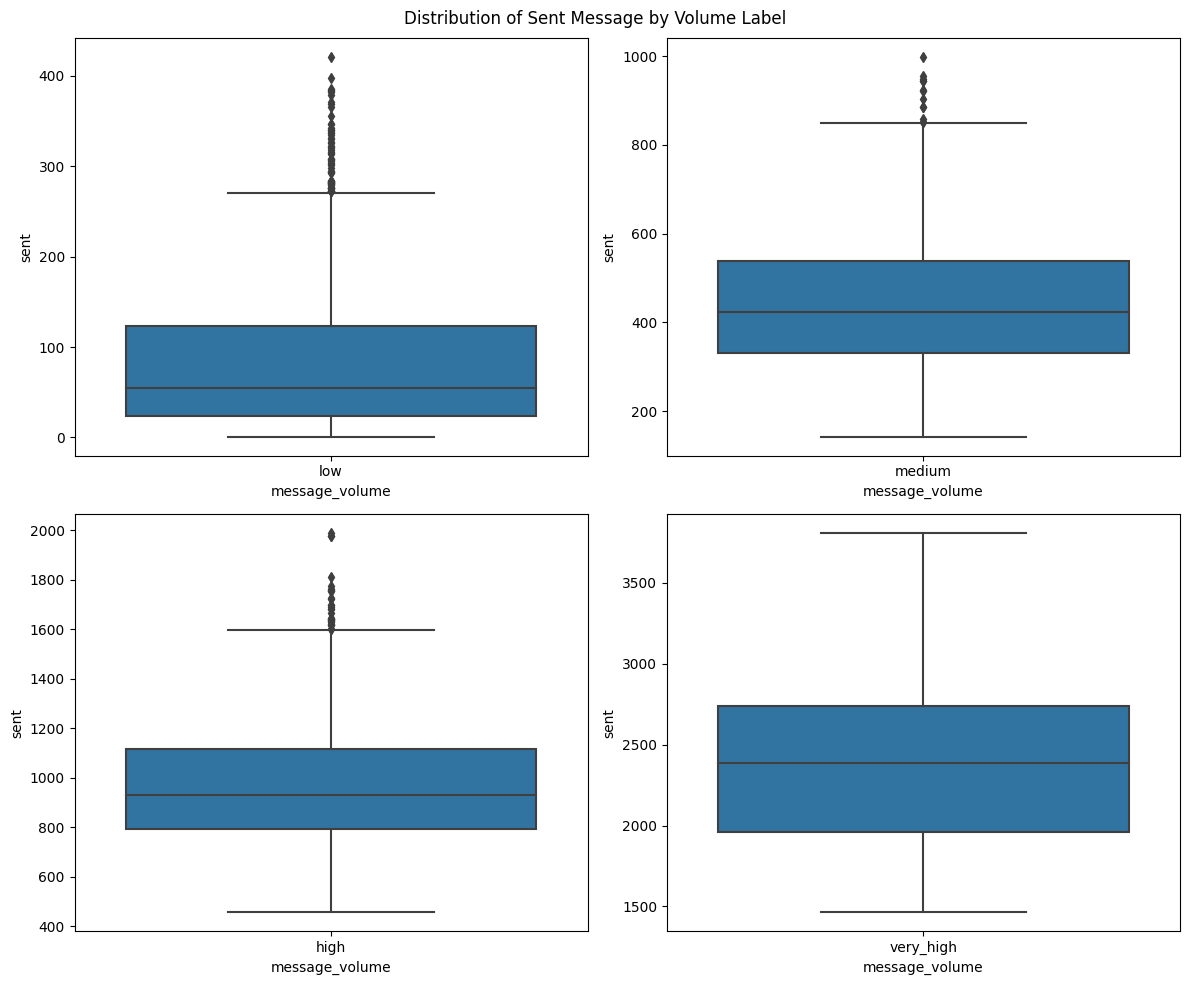

In [22]:
"""plot the distribution of sent messages by volume label"""

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
low_volume_senders = message_volume[message_volume['message_volume'] == 'low']
sns.boxplot(data=low_volume_senders, y='sent', x='message_volume', ax=ax[0, 0])
medium_volume_senders = message_volume[message_volume['message_volume'] == 'medium']
sns.boxplot(data=medium_volume_senders, y='sent', x='message_volume', ax=ax[0, 1])
high_volume_senders = message_volume[message_volume['message_volume'] == 'high']
sns.boxplot(data=high_volume_senders, y='sent', x='message_volume', ax=ax[1, 0])
very_high_volume_senders = message_volume[message_volume['message_volume'] == 'very_high']
sns.boxplot(data=very_high_volume_senders, y='sent', x='message_volume', ax=ax[1, 1])
fig.suptitle('Distribution of Sent Message by Volume Label')
plt.tight_layout()

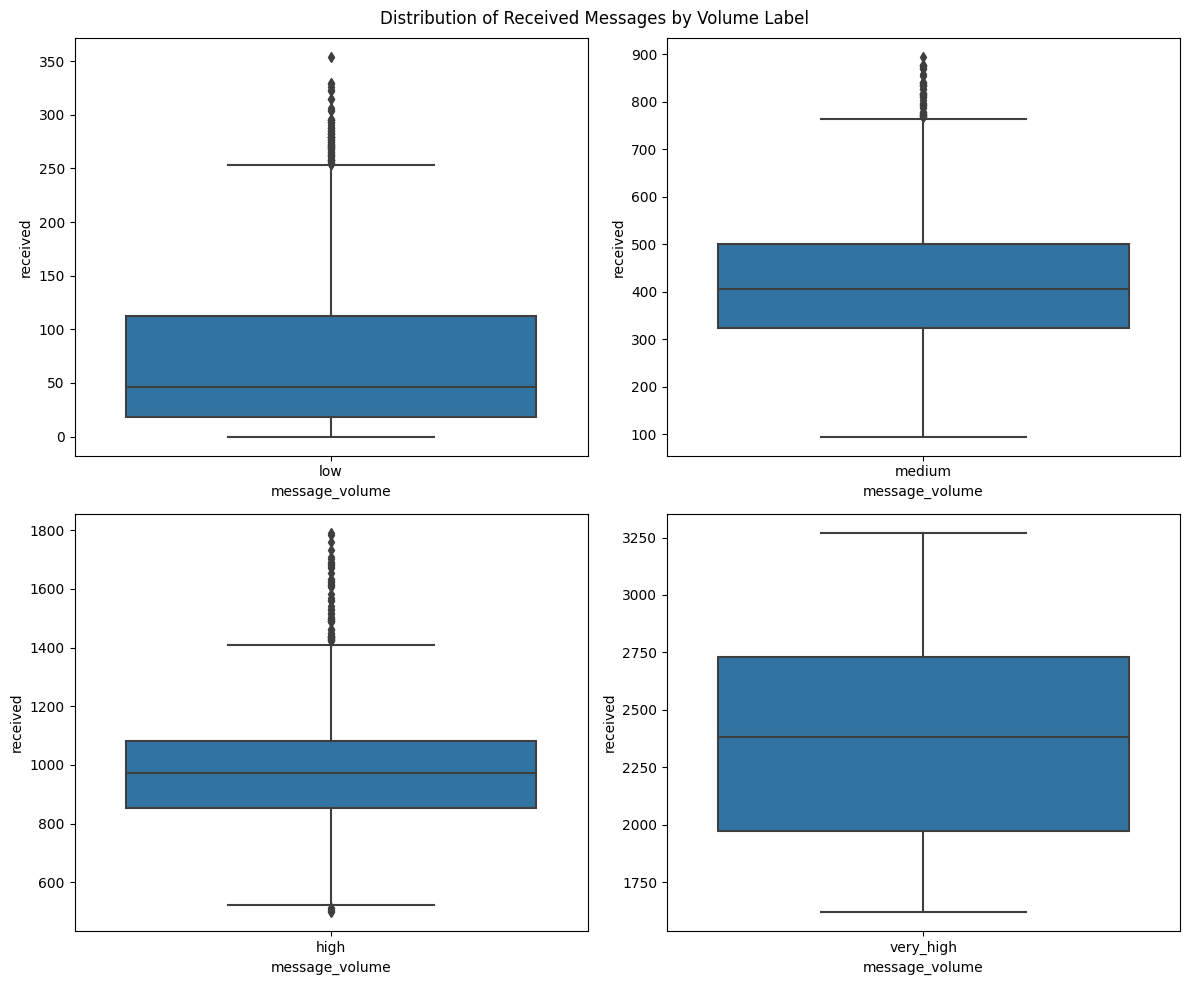

In [23]:
"""plot the distribution of received messages by volume label"""

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
low_volume_senders = message_volume[message_volume['message_volume'] == 'low']
sns.boxplot(data=low_volume_senders, y='received', x='message_volume', ax=ax[0, 0])
medium_volume_senders = message_volume[message_volume['message_volume'] == 'medium']
sns.boxplot(data=medium_volume_senders, y='received', x='message_volume', ax=ax[0, 1])
high_volume_senders = message_volume[message_volume['message_volume'] == 'high']
sns.boxplot(data=high_volume_senders, y='received', x='message_volume', ax=ax[1, 0])
very_high_volume_senders = message_volume[message_volume['message_volume'] == 'very_high']
sns.boxplot(data=very_high_volume_senders, y='received', x='message_volume', ax=ax[1, 1])
plt.suptitle('Distribution of Received Messages by Volume Label')
plt.tight_layout()

User Message Volume Analysis Summary:

Printing summary statistics for sent message volume showed the distribution of sent messages is right skewed. The skewedness of the distribution is the result of two users who have extremely high sent message volume, users 1278894 and 839736. The distribution of received message volume is right skewed too, but not nearly as much. Examining the top 10 receivers again shows the appearance of users 1278894 and 839736. The activity of these user IDs should be examined further. K-means clustering was used to apply message volume labels to each user ID in the data. Users were labeled as either “low,” “medium,” “high,” “very_high,” or “extreme.” The two user IDs labeled as extreme again belonged to users 1278894 and 839736. After labeling the data box plots were created to visually assess the distribution of both sent and received messages for each group. The count of user IDs labeled as “very_high” appear to be approximately normally distributed. 

## When is message volume the highest, does high message volume correlate with the number park visitors?

- Print total message volume for each day (Friday, Saturday, Sunday)
- Load transformed data to apply time series analysis
- Create time series plots to visualize message volume by location.
    - Create time series plots to visualize message volume by location for each day.
    - Create time series plots to visualize message volume by location over the entire weekend.

In [24]:
"""print total message volume for each day (Friday, Saturday, Sunday)"""

# get total messages for each of the three days
total_messages_friday = friday.shape[0]
total_messages_saturday = saturday.shape[0]
total_messages_sunday = sunday.shape[0]
# print totals
print("Total messages Friday: ", total_messages_friday)
print("Total messages Saturday: ", total_messages_saturday)
print("Total messages Sunday: ", total_messages_sunday)

Total messages Friday:  948739
Total messages Saturday:  1655866
Total messages Sunday:  1548724


In [25]:
"""load the transformed data to apply time series analysis"""

friday_messages_by_location = pd.read_pickle('../TransformedData/friday_messages_by_location.pkl')
saturday_messages_by_location = pd.read_pickle('../TransformedData/saturday_messages_by_location.pkl')
sunday_messages_by_location = pd.read_pickle('../TransformedData/sunday_messages_by_location.pkl')
combined_messages_by_location = pd.read_pickle('../TransformedData/combined_messages_by_location.pkl')

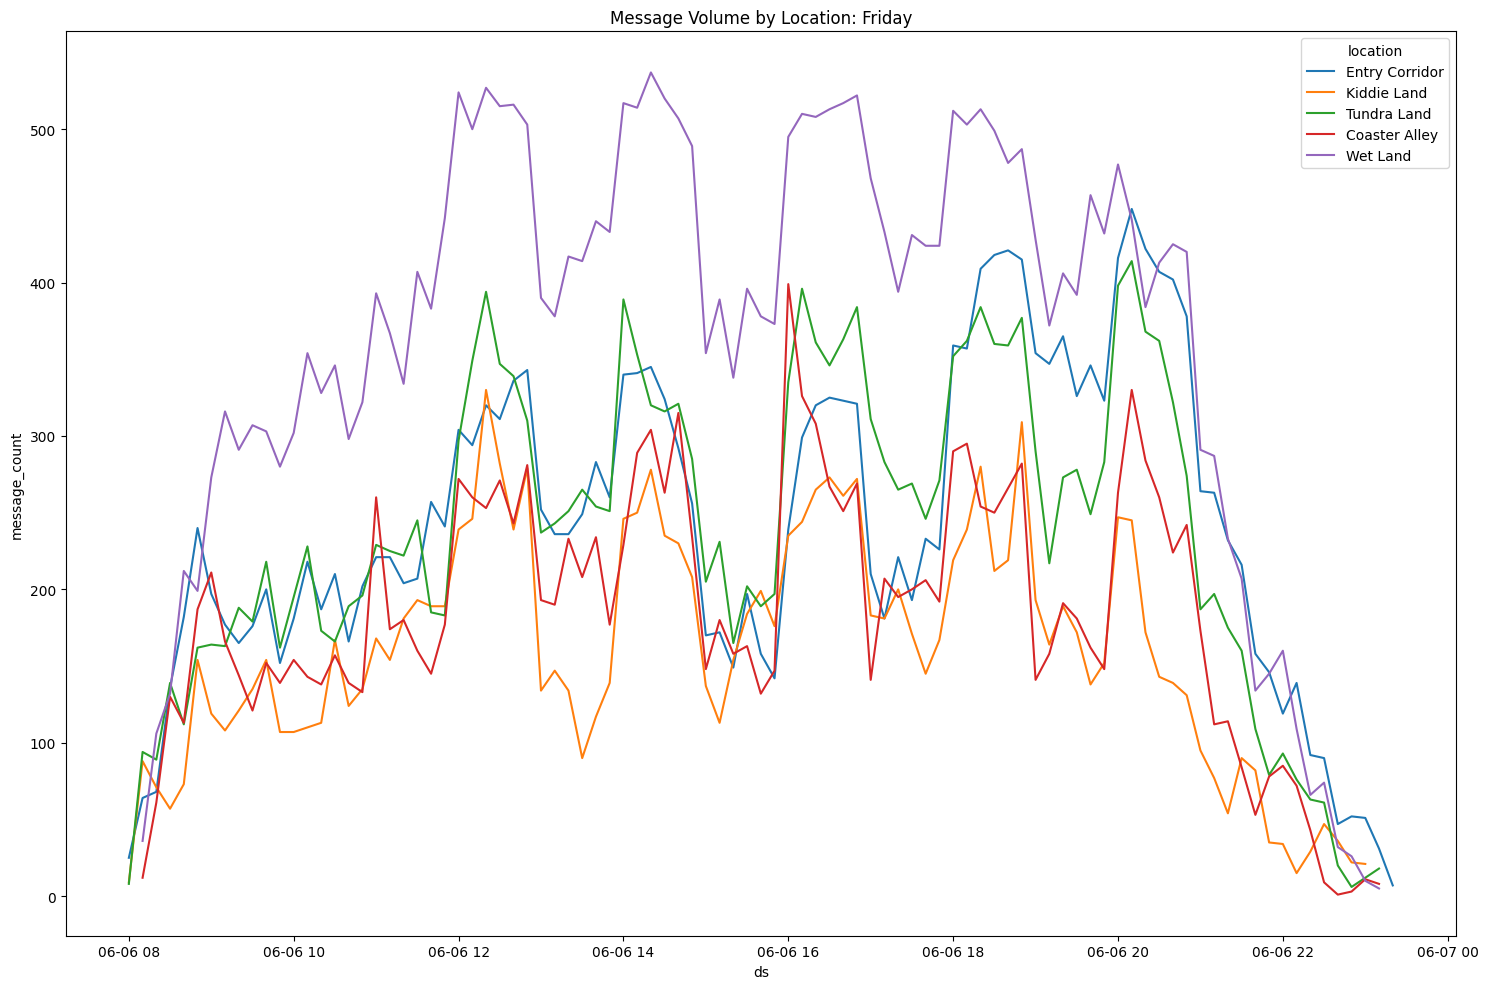

In [26]:
"""plot message volume by location for Friday"""

# prepare the data, group datetime values by hour
friday_messages_by_location_hourly  = pd.DataFrame(friday_messages_by_location.groupby([pd.Grouper(key='ds',axis=0, freq='10min' ), 'location']).size(), columns=['message_count'])
friday_messages_by_location_hourly.reset_index(inplace=True)
# create a seaborn lineplot with the grouped data
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data=friday_messages_by_location_hourly, x='ds', y='message_count', hue='location')
plt.title('Message Volume by Location: Friday')
plt.tight_layout()

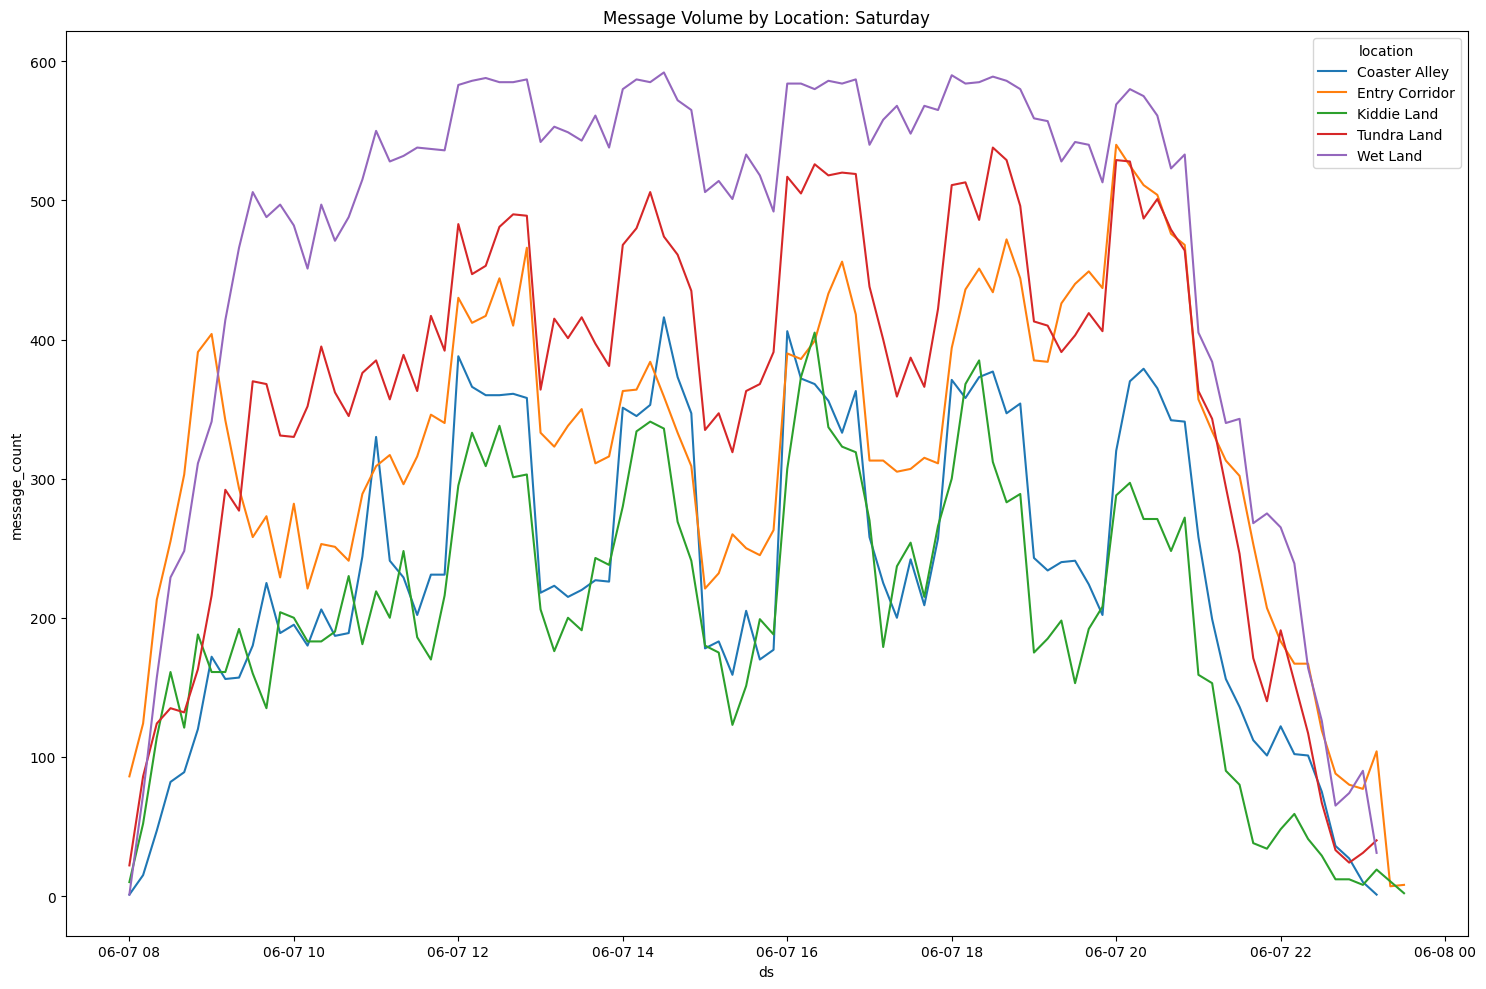

In [27]:
"""plot message volume by location for Saturday"""

# prepare the data, group datetime values by hour
saturday_messages_by_location_hourly  = pd.DataFrame(saturday_messages_by_location.groupby([pd.Grouper(key='ds',axis=0, freq='10min' ), 'location']).size(), columns=['message_count'])
saturday_messages_by_location_hourly.reset_index(inplace=True)
# create a seaborn lineplot with the grouped data
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data=saturday_messages_by_location_hourly, x='ds', y='message_count', hue='location')
plt.title('Message Volume by Location: Saturday')
plt.tight_layout()

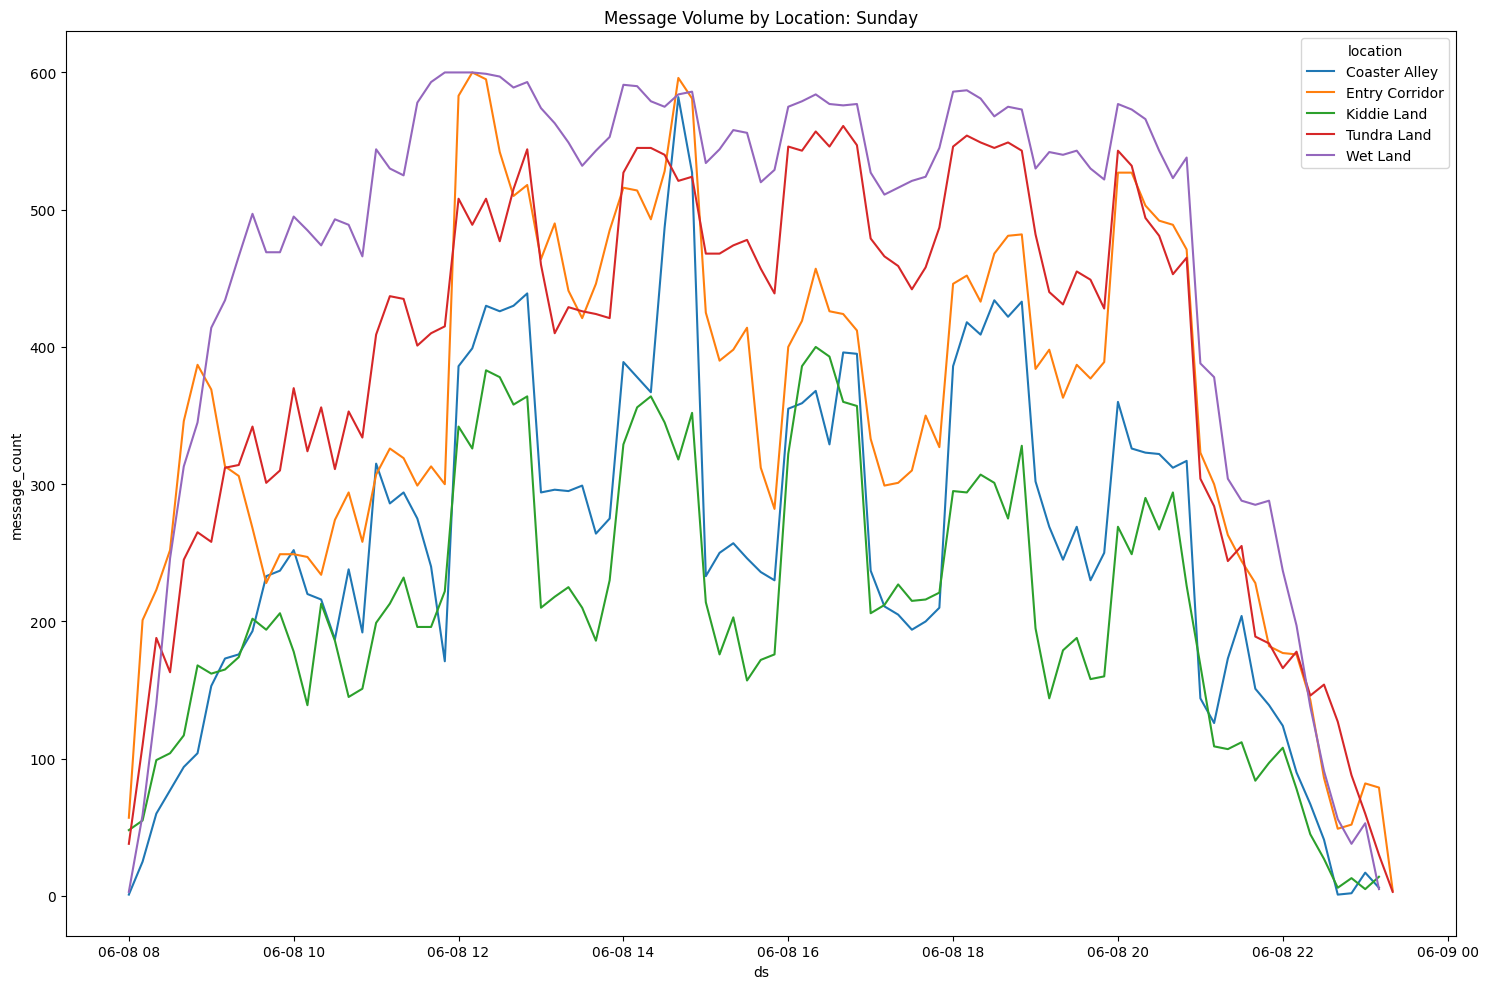

In [28]:
"""plot message volume by location for Sunday"""

# prepare the data, group datetime values by hour
sunday_messages_by_location_hourly  = pd.DataFrame(sunday_messages_by_location.groupby([pd.Grouper(key='ds',axis=0, freq='10min' ), 'location']).size(), columns=['message_count'])
sunday_messages_by_location_hourly.reset_index(inplace=True)
# create a seaborn lineplot with the grouped data
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data=sunday_messages_by_location_hourly, x='ds', y='message_count', hue='location')
plt.title('Message Volume by Location: Sunday')
plt.tight_layout()

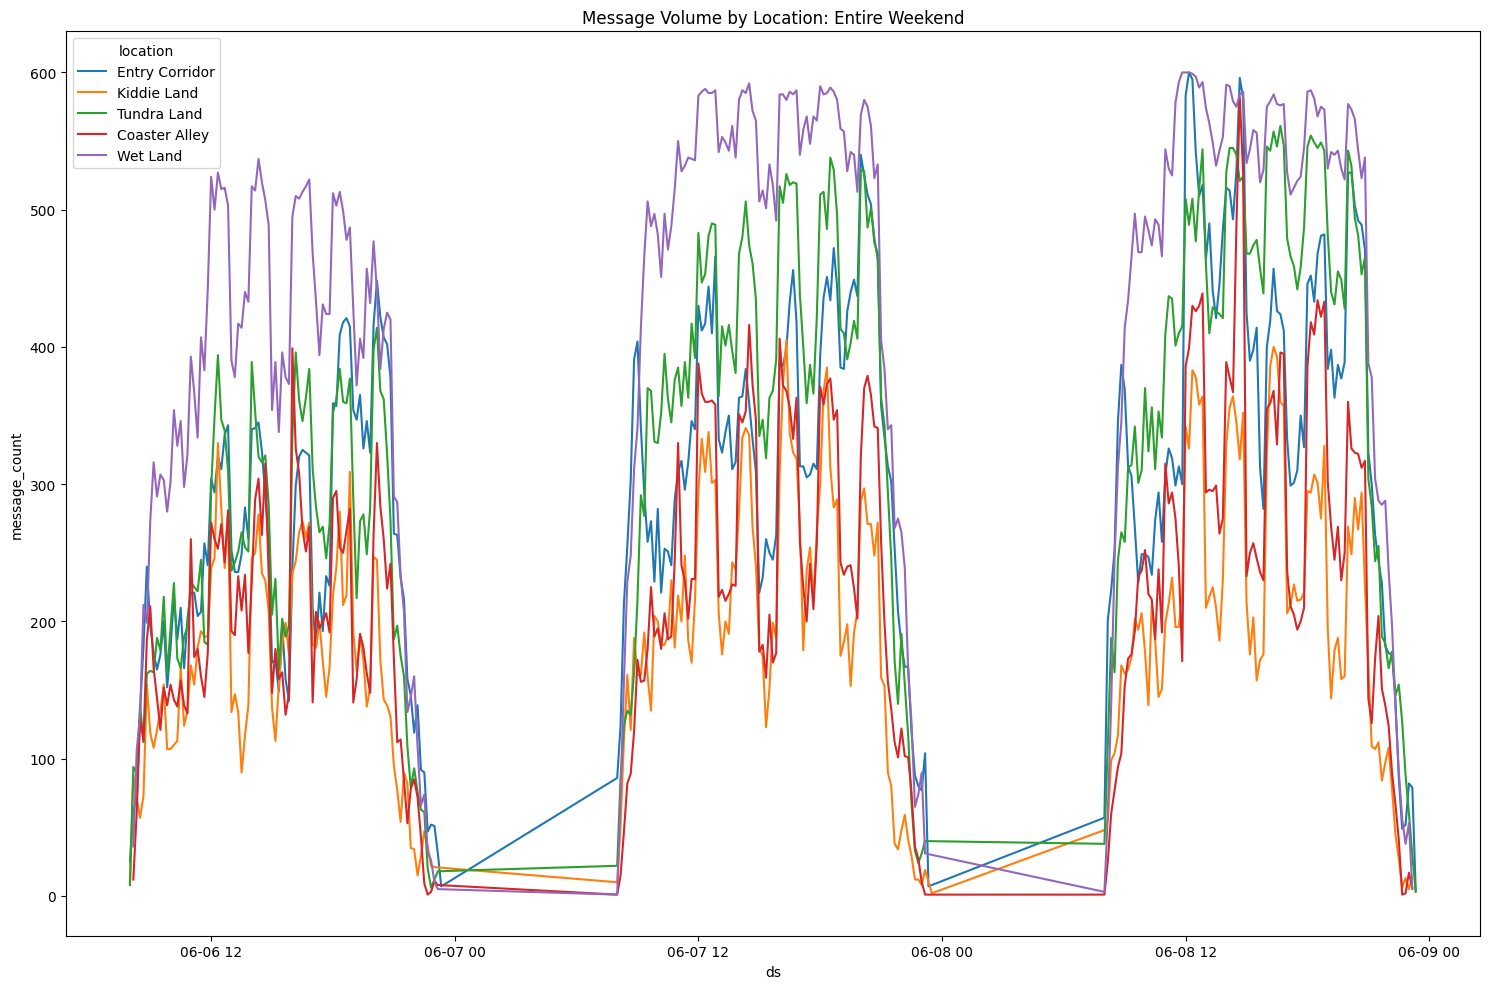

In [29]:
"""plot message volume by location for the entire weekend"""

# prepare the data, group datetime values by hour
combined_messages_by_location_hourly  = pd.DataFrame(combined_messages_by_location.groupby([pd.Grouper(key='ds',axis=0, freq='10min' ), 'location']).size(), columns=['message_count'])
combined_messages_by_location_hourly.reset_index(inplace=True)
# create a seaborn lineplot with the grouped data
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data=combined_messages_by_location_hourly, x='ds', y='message_count', hue='location')
plt.title('Message Volume by Location: Entire Weekend')
plt.tight_layout()

Communication Volume Analysis: Summary

Analysis of message volume during the weekend of the incident shows that message volume does not necessarily correlate with the total number of park attendees each day. Assuming park attendees can be measured as the total number unique app users for each day the data show that message volume was highest on Saturday with a total message count of 1,655,866 even though total park attendees was higher on Sunday with 12,158 attendees. Visualizing message volume over time by location shows several consistent patterns in the data. It’s clear the park opens at 8:00 a.m. daily and that most park goers leave DinoFun World by 8:00 p.m. each day. Wet Land is clearly the most popular area of the park showing the highest volume of communication for the entire weekend. There are consistent spikes in communication volume at Coaster Alley around 12:00 p.m. and 4:00 p.m. on both Friday and Saturday. What stands out is the same pattern of communication at Coaster Alley does not hold true for Sunday. On Sunday the 12:00 p.m. spike at Coaster Alley is evident, but an extremely high spike in communication volume at Coaster Alley also appears between 2:00 p.m. to 3:00 p.m. and the usual 4:00 p.m. spike does not appear thereafter. It’s also worth noting there is an extreme spike in communication at the Entry Corridor from approximately 2:00 p.m. to 3:00 p.m. as well. Creighton Pavilion, where the Scott Jones exhibit is hosted, is in Coaster Alley. Considering this fact, the Scott Jones exhibit likely had two scheduled showings per day at 12:00 p.m. and 4:00 p.m. respectively. The 12:00 p.m. showing for Sunday is evident in the data, but the 4:00 p.m. showing does not occur following the abnormal communication spikes between 2:00 p.m. and 3:00 p.m. This appears to be when the vandalism occurred.

# Which users have the highest volume of communication, were did high volume communication occur?

- Read in transformed data to analyze communication patterns of high volume app users.
- Visualize very high volume communication over time.
- Visualize extreme outlier communication volume over time.
- Perform furhter analysis of the communication patterns of users 1278894 and 839736.
    - Who do these users communicate with and where?
    - Do these users communicate with each other?
    - Do these users send messages to external recipients?
    - Where these users the cause of any unusual communication patterns that appear on Sunday.

In [30]:
"""Read in transformed data to analyze communication patterns of high volume app users"""

very_high_volume_senders_series = pd.read_pickle('../TransformedData/very_high_volume_senders_series.pkl')
extreme_volume_senders_series = pd.read_pickle('../TransformedData/extreme_volume_senders_series.pkl')

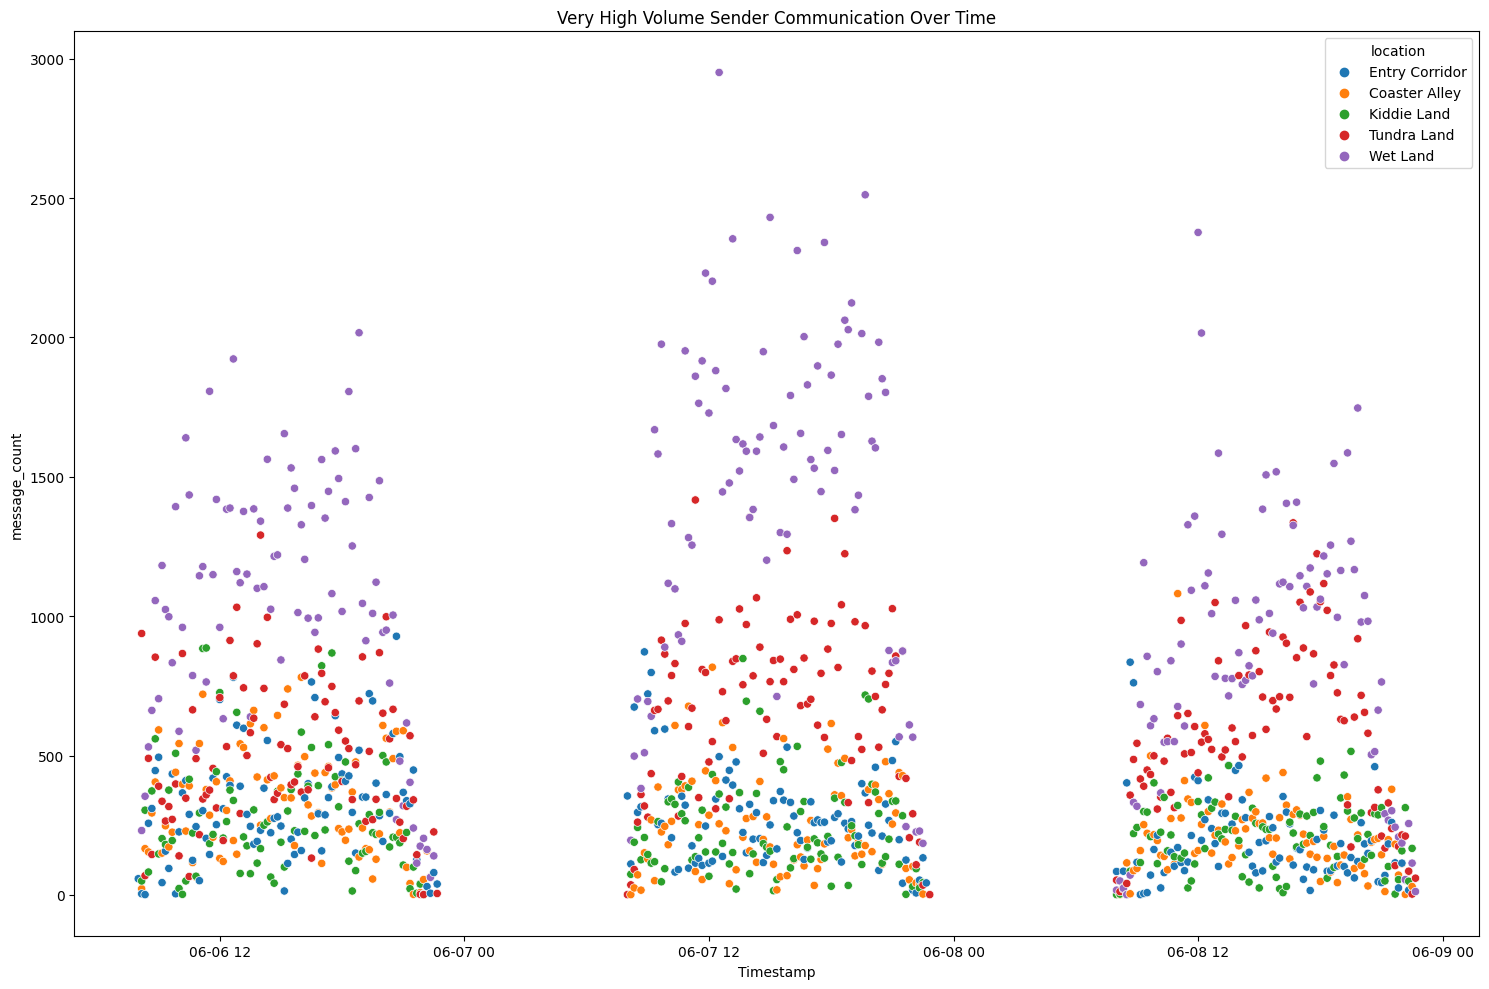

In [31]:
"""Visualize very high volume sender communication over time"""

# create a seaborn lineplot with the grouped data
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=very_high_volume_senders_series, x='Timestamp', y='message_count', hue='location')
plt.title('Very High Volume Sender Communication Over Time')
plt.tight_layout()

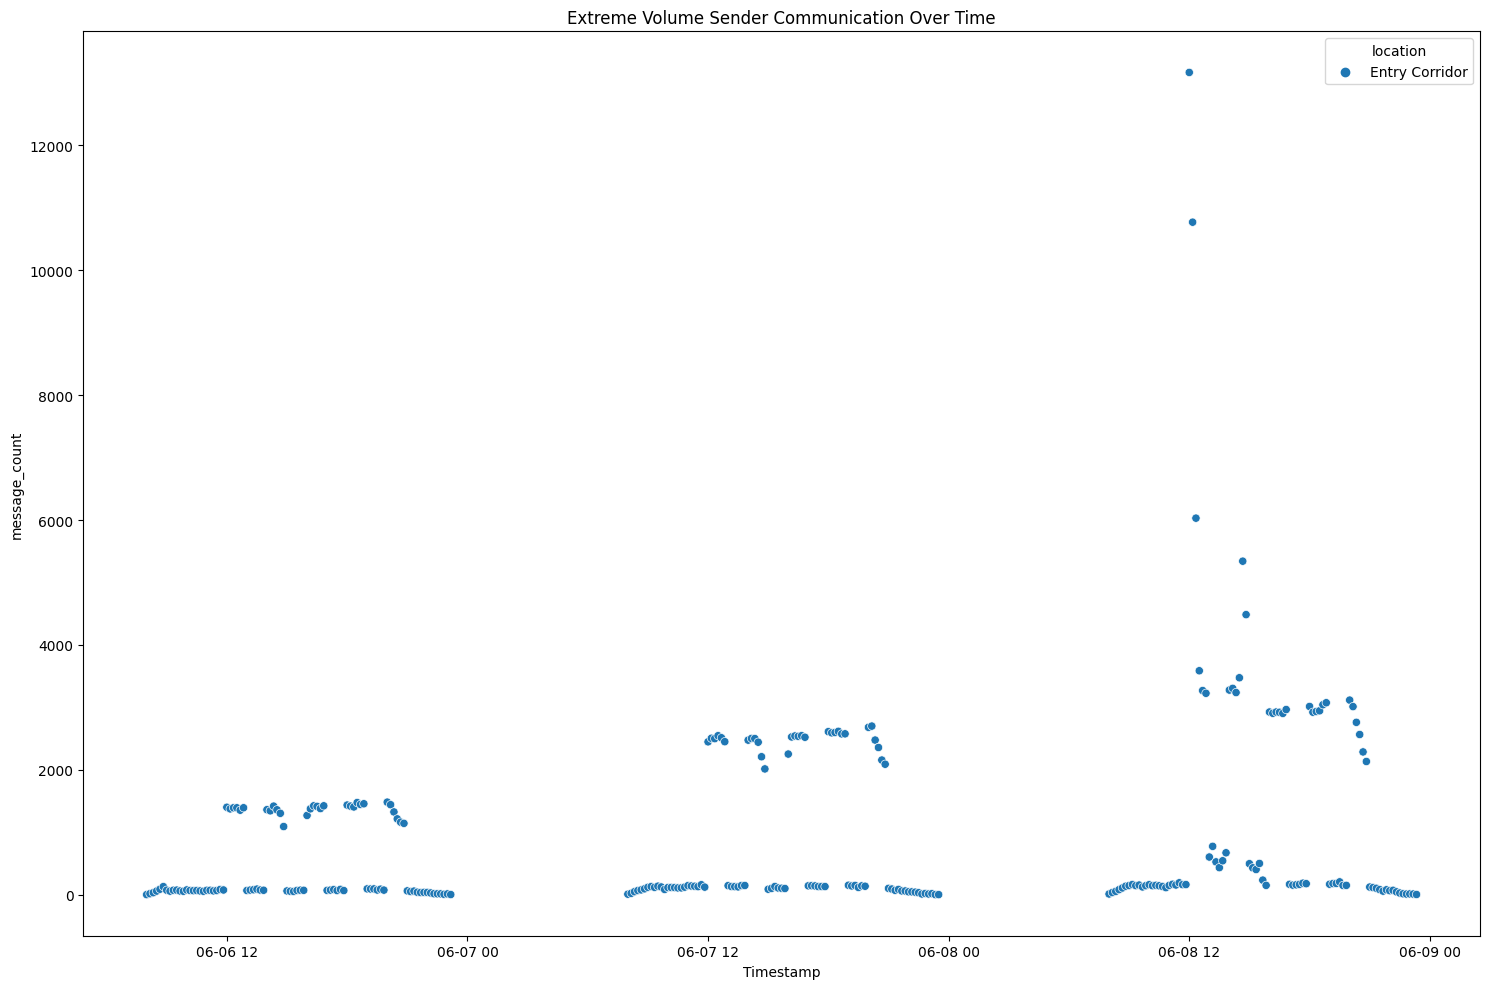

In [32]:
"""Visualize extreme volume sender communication over time"""

# create a seaborn lineplot with the grouped data
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=extreme_volume_senders_series, x='Timestamp', y='message_count', hue='location')
plt.title('Extreme Volume Sender Communication Over Time')
plt.tight_layout()

In [33]:
"""who does user 1278894 send messages to and at what locations"""

# does user 1278894 communicate with user 839736
subset_1 = combined[combined['from'] == 1278894]
subset_1 = pd.DataFrame(subset_1.groupby(by=['to', 'location']).size(), columns=['sent_count'])
subset_1.sort_values(by=['sent_count'], ascending=False)

,,sent_count
to,location,
595748,Entry Corridor,178
1447331,Entry Corridor,176
921294,Entry Corridor,176
856425,Entry Corridor,174
51893,Entry Corridor,174
...,...,...
1563594,Entry Corridor,12
1852869,Entry Corridor,12
1672782,Entry Corridor,12


In [34]:
"""who does user 1278894 receive messages from and what locations are the message sent from"""

# does user 1278894 communicate with user 839736
subset_2 = combined[combined['to'] == 1278894]
subset_2

,Timestamp,from,to,location


In [35]:
"""who does user 839736 send messages to and at what locations"""

# does user 1278894 communicate with user 839736
subset_3 = combined[combined['from'] == 839736]
subset_3 = pd.DataFrame(subset_1.groupby(by=['to', 'location']).size(), columns=['sent_count'])
subset_3.sort_values(by=['sent_count'], ascending=False)

,,sent_count
to,location,
100025,Entry Corridor,1
386177,Entry Corridor,1
377926,Entry Corridor,1
378256,Entry Corridor,1
380345,Entry Corridor,1
...,...,...
163905,Entry Corridor,1
1639202,Entry Corridor,1
1639323,Entry Corridor,1


In [36]:
"""who does user 839736 receive messages from and at what locations"""

# does user 1278894 communicate with user 839736
subset_4 = combined[combined['to'] == 839736]
subset_4

,Timestamp,from,to,location


In [37]:
"""does user 1278894 send messages to user 839736"""

subset_5 = combined[combined['from'] == 1278894]
subset_5[subset_5['to'] == 839736]

,Timestamp,from,to,location


In [38]:
"""does user 839736 send messages to user 1278894"""
subset_6 = combined[combined['from'] == 839736]
subset_6[subset_6['to'] == 1278894]

,Timestamp,from,to,location


In [39]:
"""does user 1278894 send messages to external users and where do they send these message from"""

subset_7 = combined[combined['from'] == 1278894]
subset_7 = subset_7[subset_7['to'] == 'external']
subset_7

,Timestamp,from,to,location


In [40]:
"""does user 839736 send messages to external users and where do they send these message from"""

subset_8 = combined[combined['from'] == 839736]
subset_8 = subset_8[subset_8['to'] == 'external']
subset_8

,Timestamp,from,to,location


High Volume User Communication Analysis: Summary

Analyzing users with high volume of communication again shows that Wet Land is the most popular area of the park. This park area is where the most messages have been sent and received overall and looks to be where most high-volume communication users spend their time. Visualizing communication patterns over time for extreme outliers (users 1278894 and 839736) shows that both users sent a great deal of messages from the Entry Corridor during the time the vandalism was perpetrated (between 2:00 p.m. and 4:00 p.m. Sunday) and that neither user received a message. It’s also worth noting these users did not send any message to people outside of DinoFun World. The people associated with these user ID’s should be identified and questioned regarding the crimes due to their unusual activity.


## Perform further analysis on time intervals of interest.

- Filter the Sunday data to only include correspondence between 2:00 p.m. and 4:00 p.m. Sunday.
- How many messages were sent between 2:00 p.m. and 4:00 p.m. Sunday.
- Examine user ID's that sent messages to external users between 2:00 p.m. and 4:00 p.m. Sunday.

In [41]:
"""filter sunday data to only include correspondence occuring between 2:00 p.m. and 4:00 p.m. Sunday"""

start_date = '2014-06-08 16:00:00'
end_date = '2104-06-08 18:00:00'

sunday_2_4 = sunday.loc[(sunday['Timestamp'] >= start_date)&(sunday['Timestamp'] <= end_date)]
sunday_2_4

,Timestamp,from,to,location
854034,2014-06-08 16:00:00,1278894,1689151,Entry Corridor
854035,2014-06-08 16:00:00,1278894,1105427,Entry Corridor
854036,2014-06-08 16:00:00,1278894,1143856,Entry Corridor
854037,2014-06-08 16:00:00,1278894,1346077,Entry Corridor
854038,2014-06-08 16:00:00,1278894,851421,Entry Corridor
...,...,...,...,...
1548719,2014-06-08 23:20:37,1983198,external,Tundra Land
1548720,2014-06-08 23:20:38,1555391,857616,Tundra Land
1548721,2014-06-08 23:21:04,839736,2022346,Entry Corridor
1548722,2014-06-08 23:22:05,839736,1109589,Entry Corridor


In [42]:
"""How many messages were sent between 2:00 p.m. and 4:00 p.m. Sunday."""

sunday_2_4_total = sunday_2_4.shape[0]
print("Total message sent between 2:00 p.m. and 4:00 p.m. Sunday: ", sunday_2_4_total)

Total message sent between 2:00 p.m. and 4:00 p.m. Sunday:  694690


In [43]:
"""examine user ID's that sent messages to external users between 2:00 p.m. and 4:00 p.m. Sunday """

sunday_2_4_external = sunday_2_4[(sunday_2_4['location'] == 'Coaster Alley')&(sunday_2_4['to'] == 'external')]
sunday_2_4_external = pd.DataFrame(sunday_2_4_external.groupby(by=['from']).size(), columns=['external_sent_count']).sort_values(by=['external_sent_count'], ascending=False)
sunday_2_4_external.head(20)

,external_sent_count
from,
1758848,4
836726,4
1624962,4
967137,3
1873529,3
675616,3
1524688,3
1607917,3
1964353,3


Analysis of Time Intervals of Interest: Summary

Further analysis of the suspected time interval when the crime occurred shows that 694690 messages were sent between 2:00 p.m. and 4:00 p.m. Sunday. Of this 1259 messages were sent to external users from the Coaster Alley location. The time interval analysis did not provide any conclusive evidence of who committed the crime.

## Analysis Results and Hypothesis

![Park Map](Park_Map.png)

Analysis of communication patterns in data collected from the DinoFun World communication app the weekend of the crime provided key insights which may lead to the apprehension of the person or people who vandalized the Scott Jones exhibit and made off with some of the soccer star’s Olympic medals. Basic exploratory analysis showed that many app users attended the park for all three days of the weekend and that not all app users sent and received messages. That is, some user only received or only sent messages. Kmeans clustering was used to label users based on communication volume. Four labels were determined “low”, “medium”, “high”, “very_high”, and “extreme.” The extreme category consisted of two users 1278894 and 839736. Message volume was then analyzed over time. This showed the Scott Jones exhibit had two regular showings scheduled for 12:00 p.m. and 4:00 p.m. each day of the weekend. It was then determined that the crime was committed in the Coaster Alley location (the park area highlighted in light red in the map above) on Sunday between approximately 2:00 p.m. and 3:00 p.m. This determination was made by considering the following facts and analysis insights:

- The Scott Jones exhibit was hosted at Creighton Pavilion (location 32 in the map above). This further confirms the spikes in communication volume seen at 12:00 p.m. and 4:00 p.m. in the Coaster Alley location.
- Regular showings at the Scott Jones exhibit appear to have went forward as planned on Friday, Saturday, and for the 12:00 p.m. Sunday showing, but there was no regular spike in communication during the 4:00 p.m. Sunday showing.
- A spike in communication was seen in the Coaster Alley area between 2:00 p.m. and 3:00 p.m. Sunday. This is when the crime was committed.
- Users 1278894 and 839736 also showed large spikes in communication volume between 2:00 p.m. and 3:00 p.m. Sunday, in the DinoFun World Entry Corridor location.

Results of the analysis will be turned over to local authorities and the following recommendations are made for further investigation:

- Users 1278894 and 839736 should be questioned about their unusual messaging activity.
- Users who were present in the Coaster Alley location between 2:00 p.m. and 4:00 p.m. Sunday should be considered a key group of interest and questioned further.